Starting with logistic regression. (Note after first run: probably needs undersampling, and maybe it's not necessary to downscale so much)

Preprocessing images...
Preprocessing complete.
Training Logistic Regression Model...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.950984595615814..2.149652784604936].



Validation Results:
              precision    recall  f1-score   support

           0       0.99      0.85      0.92       378
           1       0.73      0.98      0.84       156

    accuracy                           0.89       534
   macro avg       0.86      0.92      0.88       534
weighted avg       0.92      0.89      0.89       534

Validation Accuracy: 0.8895131086142322

Test Results:
              precision    recall  f1-score   support

           0       0.99      0.83      0.91       392
           1       0.68      0.99      0.80       142

    accuracy                           0.87       534
   macro avg       0.84      0.91      0.86       534
weighted avg       0.91      0.87      0.88       534

Test Accuracy: 0.8726591760299626

Visualizing Predictions on Test Set:


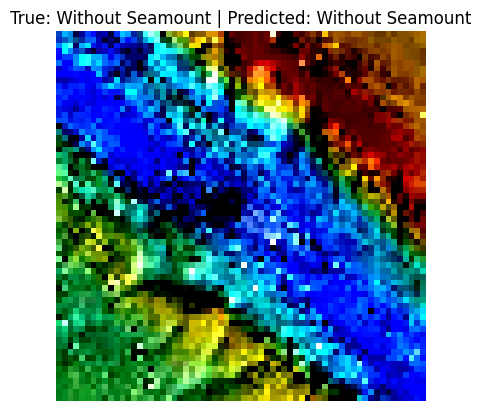

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.6294834139394734..3.302722728052808].


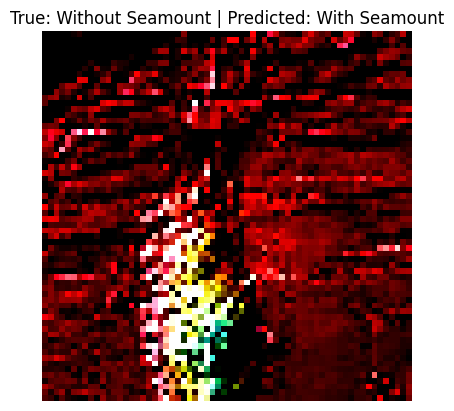

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.123528267488991..3.366746194259781].


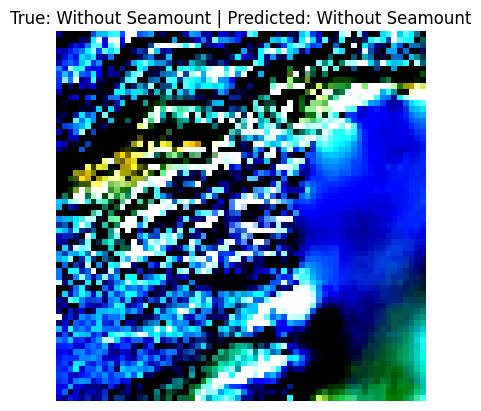

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.05828582803243209..1.286419795406574].


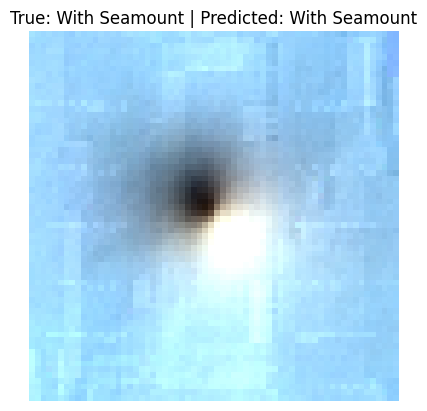

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.50014830731604..3.385882278710715].


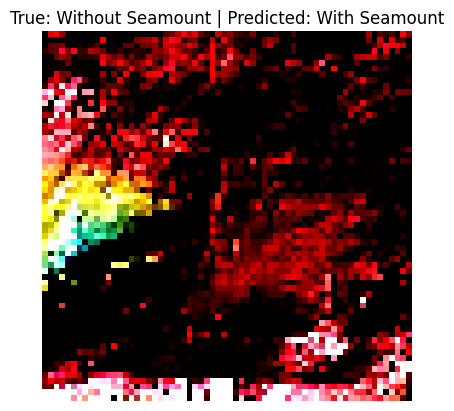

In [2]:
# Linear Regression Notebook for Binary Classification of Seamounts

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Parameters
image_folder = "dataset_for_galore_vol_1_1"  # Root directory of the dataset
output_folder = "temp_processed_images"  # Temporary folder for cropped images
image_size = (64, 64)  # Downscaled image size
crop_pixels = 70  # Pixels to crop from each border
categories = ["with_seamount", "without_seamount"]  # Subfolders in `image_folder`

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Function to crop borders from an image
def crop_fixed_border(image, crop_pixels=5):
    height, width, _ = image.shape
    if height > crop_pixels * 2 and width > crop_pixels * 2:
        cropped_image = image[crop_pixels:height-crop_pixels, crop_pixels:width-crop_pixels]
        return cropped_image
    else:
        return image  # Return original image if cropping not possible

# Preprocess images (cropping and resizing)
print("Preprocessing images...")
for category in categories:
    category_folder = os.path.join(image_folder, category)
    output_category_folder = os.path.join(output_folder, category)
    os.makedirs(output_category_folder, exist_ok=True)
    
    for file_name in os.listdir(category_folder):
        image_path = os.path.join(category_folder, file_name)
        output_path = os.path.join(output_category_folder, file_name)
        try:
            image = cv2.imread(image_path)
            if image is not None:
                cropped_image = crop_fixed_border(image, crop_pixels)
                resized_image = cv2.resize(cropped_image, image_size)
                cv2.imwrite(output_path, resized_image)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")

print("Preprocessing complete.")

# Load processed dataset
def load_data(directory, categories):
    data, labels = [], []
    for label, category in enumerate(categories):
        category_folder = os.path.join(directory, category)
        for file_name in os.listdir(category_folder):
            file_path = os.path.join(category_folder, file_name)
            image = cv2.imread(file_path)
            if image is not None:
                data.append(image.flatten())  # Flatten to vector for regression
                labels.append(label)
    return np.array(data), np.array(labels)

data, labels = load_data(output_folder, categories)

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize pixel values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Train logistic regression model
print("Training Logistic Regression Model...")
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

# Evaluate model
y_val_pred = logistic_model.predict(X_val)
y_test_pred = logistic_model.predict(X_test)

print("\nValidation Results:")
print(classification_report(y_val, y_val_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

print("\nTest Results:")
print(classification_report(y_test, y_test_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Visualize a few test images with predictions
def visualize_predictions(X, y_true, y_pred, num_images=5):
    indices = np.random.choice(len(X), num_images, replace=False)
    for i in indices:
        img = X[i].reshape(image_size[0], image_size[1], 3)  # Reshape to original image dimensions
        true_label = "With Seamount" if y_true[i] == 1 else "Without Seamount"
        predicted_label = "With Seamount" if y_pred[i] == 1 else "Without Seamount"
        
        plt.figure()
        plt.imshow(img)
        plt.title(f"True: {true_label} | Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

print("\nVisualizing Predictions on Test Set:")
visualize_predictions(X_test, y_test, y_test_pred, num_images=5)


Now: Random Forest

Preprocessing images...
Preprocessing complete.
Training Random Forest Classifier...

Validation Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       378
           1       1.00      0.95      0.97       156

    accuracy                           0.99       534
   macro avg       0.99      0.97      0.98       534
weighted avg       0.99      0.99      0.98       534

Validation Accuracy: 0.9850187265917603

Test Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       392
           1       0.99      0.95      0.97       142

    accuracy                           0.99       534
   macro avg       0.99      0.97      0.98       534
weighted avg       0.99      0.99      0.98       534

Test Accuracy: 0.9850187265917603


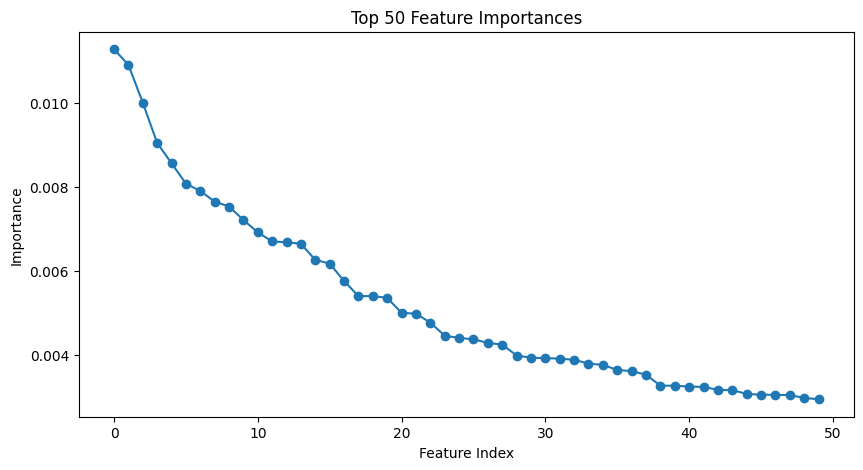

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.8316807319906196..3.269783314901836].



Visualizing Predictions on Test Set:


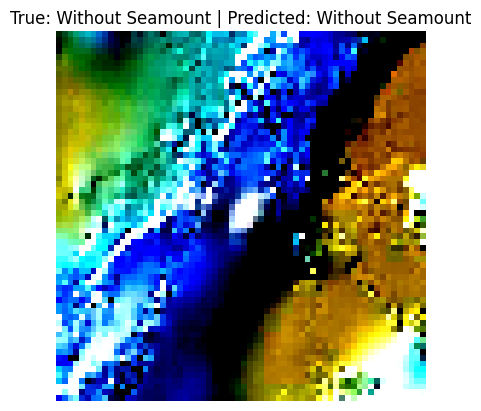

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.9492910977821762..3.040819833415037].


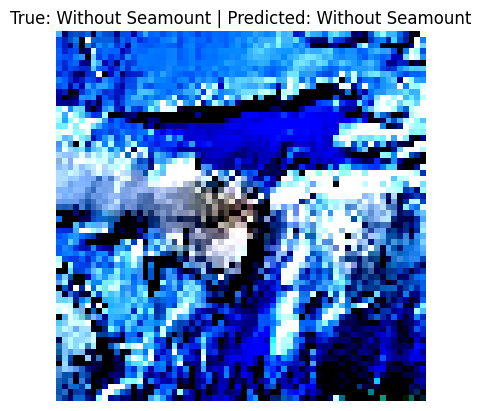

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.4010897803000866..3.199163061350326].


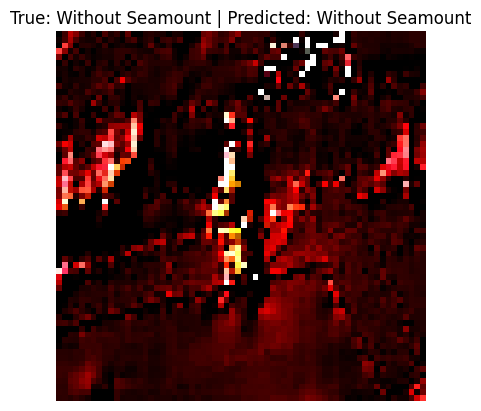

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.4169941427021993..3.2650276586202933].


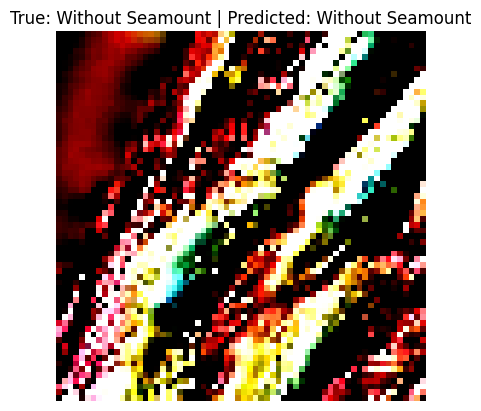

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.143977925144864..1.5256237560241213].


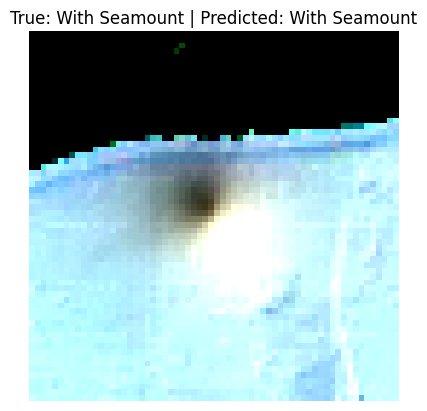

In [3]:
# Random Forest Classifier for Binary Classification of Seamounts

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Parameters
image_folder = "dataset_for_galore_vol_1_1"  # Root directory of the dataset
output_folder = "temp_processed_images_rf"  # Temporary folder for cropped images
image_size = (64, 64)  # Downscaled image size
crop_pixels = 70  # Pixels to crop from each border
categories = ["with_seamount", "without_seamount"]  # Subfolders in `image_folder`

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Function to crop borders from an image
def crop_fixed_border(image, crop_pixels=5):
    height, width, _ = image.shape
    if height > crop_pixels * 2 and width > crop_pixels * 2:
        cropped_image = image[crop_pixels:height-crop_pixels, crop_pixels:width-crop_pixels]
        return cropped_image
    else:
        return image  # Return original image if cropping not possible

# Preprocess images (cropping and resizing)
print("Preprocessing images...")
for category in categories:
    category_folder = os.path.join(image_folder, category)
    output_category_folder = os.path.join(output_folder, category)
    os.makedirs(output_category_folder, exist_ok=True)
    
    for file_name in os.listdir(category_folder):
        image_path = os.path.join(category_folder, file_name)
        output_path = os.path.join(output_category_folder, file_name)
        try:
            image = cv2.imread(image_path)
            if image is not None:
                cropped_image = crop_fixed_border(image, crop_pixels)
                resized_image = cv2.resize(cropped_image, image_size)
                cv2.imwrite(output_path, resized_image)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")

print("Preprocessing complete.")

# Load processed dataset
def load_data(directory, categories):
    data, labels = [], []
    for label, category in enumerate(categories):
        category_folder = os.path.join(directory, category)
        for file_name in os.listdir(category_folder):
            file_path = os.path.join(category_folder, file_name)
            image = cv2.imread(file_path)
            if image is not None:
                data.append(image.flatten())  # Flatten to vector for RF model
                labels.append(label)
    return np.array(data), np.array(labels)

data, labels = load_data(output_folder, categories)

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize pixel values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Train Random Forest model
print("Training Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

print("\nValidation Results:")
print(classification_report(y_val, y_val_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

print("\nTest Results:")
print(classification_report(y_test, y_test_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Feature Importance (Optional)
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 5))
plt.plot(np.sort(feature_importances)[::-1][:50], marker='o')
plt.title("Top 50 Feature Importances")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

# Visualize a few test images with predictions
def visualize_predictions(X, y_true, y_pred, num_images=5):
    indices = np.random.choice(len(X), num_images, replace=False)
    for i in indices:
        img = X[i].reshape(image_size[0], image_size[1], 3)  # Reshape to original image dimensions
        true_label = "With Seamount" if y_true[i] == 1 else "Without Seamount"
        predicted_label = "With Seamount" if y_pred[i] == 1 else "Without Seamount"
        
        plt.figure()
        plt.imshow(img)
        plt.title(f"True: {true_label} | Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

print("\nVisualizing Predictions on Test Set:")
visualize_predictions(X_test, y_test, y_test_pred, num_images=5)
